$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\cset}[1]{\mathcal{#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\ip}[3]{\left<#1,#2\right>_{#3}}
\newcommand{\given}[]{\,\middle\vert\,}
\newcommand{\DKL}[2]{\cset{D}_{\text{KL}}\left(#1\,\Vert\, #2\right)}
\newcommand{\grad}[]{\nabla}
$$

# Part 3: Mini-Project
<a id=part3></a>

### Guidelines

- You should implement the code which displays your results in this notebook, and add any additional code files for your implementation in the `project/` directory. You can import these files here, as we do for the homeworks.
- Running this notebook should not perform any training - load your results from some output files and display them here. The notebook must be runnable from start to end without errors.
- You must include a detailed write-up (in the notebook) of what you implemented and how. 
- Explain the structure of your code and how to run it to reproduce your results.
- Explicitly state any external code you used, including built-in pytorch models and code from the course tutorials/homework.
- Analyze your numerical results, explaining **why** you got these results (not just specifying the results).
- Where relevant, place all results in a table or display them using a graph.
- Before submitting, make sure all files which are required to run this notebook are included in the generated submission zip.
- Try to keep the submission file size under 10MB. Do not include model checkpoint files, dataset files, or any other non-essentials files. Instead include your results as images/text files/pickles/etc, and load them for display in this notebook. 

## Sentiment Analysis with Self-Attention and Word Embeddings

Based on Tutorials 6 and 7, we'll implement and train an improved sentiment analysis model.
We'll use self-attention instead of RNNs and incorporate pre-trained word embeddings.

In tutorial 6 we saw that we can train word embeddings together with the model.
Although this produces embeddings which are customized to the specific task at hand,
it also greatly increases training time.
A common technique is to use pre-trained word embeddings.
This is essentially a large mapping from words (e.g. in english) to some
high-dimensional vector, such that semantically similar words have an embedding that is
"close" by some metric (e.g. cosine distance).
Use the [GloVe](https://nlp.stanford.edu/projects/glove/) 6B embeddings for this purpose.
You can load these vectors into the weights of an `nn.Embedding` layer.

In tutorial 7 we learned how attention can be used to learn to predict a relative importance
for each element in a sequence, compared to the other elements.
Here, we'll replace the RNN with self-attention only approach similar to Transformer models, roughly based on [this paper](https://www.aclweb.org/anthology/W18-6219.pdf).
After embedding each word in the sentence using the pre-trained word-embedding a positional-encoding vector is added to provide each word in the sentence a unique value based on it's location.
One or more self-attention layers are then applied to the results, to obtain an importance weighting for each word.
Then we classify the sentence based on the average these weighted encodings.


Now, using these approaches, you need to:

- Implement a **baseline** model: Use pre-trained embeddings with an RNN-based model.
You can use LSTM/GRU or bi-directional versions of these, in a way very similar to what we implemented in the tutorial.
-  Implement an **improved** model: Based on the self-attention approach, implement an attention-based sentiment analysis model that has 1-2 self-attention layers instead of an RNN. You should use the same pre-trained word embeddings for this model.
- You can use pytorch's built-in RNNs, attention layers, etc.
- For positional encoding you can use the sinosoidal approach described in the paper (first proposed [here](https://arxiv.org/pdf/1706.03762.pdf)). You can use existing online implementations (even though it's straightforward to implement). 
- You can use the SST database as shown in the tutorial.

Your results should include:
- Everything written in the **Guidelines** above.
- A comparative analysis: compare the baseline to the improved model. Compare in terms of overall classification accuracy and show a multiclass confusion matrix.
- Visualize of the attention maps for a few movie reviews from each class, and explain the results.

# Sentiment Analysis Using Self Attention, with GloVe 6B Embedding
## Authors : Yiftach Edelstein And Gur Telem

### Data Analysis 

We began with this project by first analysing the data, its variability, and its length vs sentiment classes. we thought it would provide some insights with the final results, which we hope to show you here.

#### Rough split
We begin working on this dataset, by first, analyzing what is the split of data to the sentiment classes in the actual data set. we decided we must first know, what is the actual data split of our dataset, in order to "understand" the network and the attention mechanisms we will use.
<div>
    <img src="project/assets/data_analysis/fine_grained_pie.png" width="45%"/>
    <img src="project/assets/data_analysis/coarse_grained_pie.png" width="45%"/>
</div>

we can see the split is roughly the same between negative and positive reviews, while the neutral reviews is a small minority. 
in addition, the extreme reviews are not as common, as seeing the very negative and very positive reviews, are both somewhat uncommon.

##### Length VS Final Sentiment
<div>
    <img src="project/assets/data_analysis/finegrained_length_plot.png" width="45%"/>
    <img src="project/assets/data_analysis/coarsegrained_length_plot.png" width="45%"/>
</div>
in the fine grained graph, We can see (even though it is a bit crowded) that the very positive reviews and the neutral are shorter than most, but all other lengths split roughly equally accross all lengths of sentence and review sequences. 
and looking at it not finely-grained:

in the coarse grained graph it's easier to see that the neutral reviews are typically shorter than other sentiments

### Training Procedure

Both Models were trained on the SST Dataset, using the code attached in the project directory, Using the finegrained SST-5 Class labels, with NLL Loss (similarily to the Tutorial about sequence models). The hyper parameters are described per model, below.
In order to run the training of the model, you must only run the following script:

#### LSTM

train_lstm.py

#### Attention

train_attention.py

the hyper parameters will already be there.

## WRITE TRAINING PROCEDURE HERE

### LSTM Model
Here we applied the baseline model on the dataset, with a simple, LSTM, 2 layer, with dropout. 

<code>
   LSTMModel(
  (embedding): Embedding(15482, 300)
  (lstm_net): LSTM(300, 100, num_layers=2, batch_first=True, dropout=0.7)
  (output_layer): Linear(in_features=100, out_features=5, bias=False)
  (log_softmax): LogSoftmax(dim=1)
)
</code>

| Hyper Parameter | Value |
| :-: | :-: |
| Learning Rate | 0.0003 |
| Epochs | 70 |
| Layer Count | 2 | 
| Bidrectional | False |
| Dropout | 0.7 |
| Hidden Dim | 100 |

as a result, we have reached the following result on the test set:

| Test Loss | Test Accuracy |
| :-: | :-: |
| 1.393 | 41.6 |

with the following confusion matrix, where we have normalized it accross its columns, to see how much of the tagging was "correct":
<div>
<img src="project/assets/confusion_matrices/lstm_confusion_map.png" width="1000"/>
</div>
as we can see here, the model is pretty good at understanding what review is positive, very positive, and negative. it fails at understanding neutrality, thinking it to be more positive than negative, which might result as part of the length of both mean reviews of those types, and is very bad at understanding what is very negative. this makes sense to us, seeing as there is very little data points of very negative reviews, which might result in our model not having enough reviews to properly understand what is negative. we also see that the very negative results aren't quite being able to be associated with negative results, so the net didn't understand the general sentiment either, and is confused between very negative and positive sentiment results


### Self Attention Model
Here we have modeled a net as a Self Attention network Model, with the following architecture:
<code>
AttentionModel(
  (layers): Sequential(
    (0): Embedding(15482, 300)
    (1): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (2): Sublayer(
      (attn): MultiplicativeAttention(
        (softmax): Softmax(dim=-1)
      )
      (channel_mod): Conv1d(300, 600, kernel_size=(1,), stride=(1,))
      (layer_norm): LayerNorm((600,), eps=1e-05, elementwise_affine=True)
    )
    (3): Linear(in_features=600, out_features=600, bias=False)
    (4): ReLU()
    (5): Dropout(p=0.7, inplace=False)
    (6): Sublayer(
      (attn): MultiplicativeAttention(
        (softmax): Softmax(dim=-1)
      )
      (channel_mod): Conv1d(600, 600, kernel_size=(1,), stride=(1,))
      (layer_norm): LayerNorm((600,), eps=1e-05, elementwise_affine=True)
    )
  )
  (fc): Linear(in_features=600, out_features=5, bias=False)
)
</code>

and these is the result we have reached on the test set:

| Test Loss | Test Accuracy |
| --- | --- |
| 1.303 | 44.7 |

With the following hyper parameters:
 
| Hyper Parameter | Value |
| :-: | :-: |
| Learning Rate | 0.0001 |
| Epochs | 70 |
| Layer Count | 2 | 
| Dropout | 0.7 |

<div>
<img src="project/assets/confusion_matrices/attention_confusion_map.png" width="1000"/>
</div>

We have seen that a 2 layer SSAN(as described in the paper) reached some very nice results, but not quite the results reached in the paper. we think there could be some improvements found in using a multi-headded setup, with the proper hyper-params, but we are quite satisfied with the results. we can see that the confusion matrix shows a very neat situation, where the net is very good at tagging the appropriate sentiment to its proper value, and where it makes a mistake it is very homogenous on its mistake, therefore, not leaning heavily to any other sentiment. this means the net is length invariant as wanted. 

Some attention matrices to see some issues and interesting ideas we saw happen:

We'll look at them label by label:

#### Very Positive:

<div>
<img src="project/assets/attention_maps/attention_very_positive.png" width="1200"/>
</div>
<!-- ![attention_very_positive.png]() -->

We can see, that the net decided, that the most important feature of the sentence to focus on would be the dialogue, and with it, it being **good**. this is interesting as a person would also focus on that feature to judge if a movie is good or not. besides that it associated fun, and more with it aswell. this was interesting to see.

<div>
<img src="project/assets/attention_maps/attention_very_positive_2.png" width="1200"/>
</div>

Another example of an attention map that shows what the network "saw" in the sentence.

<div>
<img src="project/assets/attention_maps/attention_very_positive_3.png" width="1200"/>
</div>

This is a great example of an attention map giving us a very insightful look to the net analysis of a sentance, and specifically, highlighting the advantage of an explainable model such as a self attention model. we can see the net saw the part of it being a captivating film, as **much** more important than every other part of the sentence.

#### Positive

<div>
<img src="project/assets/attention_maps/attention_positive.png" width="45%"/>
<img src="project/assets/attention_maps/attention_positive_2.png" width="45%"/>
</div>

Here 2 attention maps of a positive review that don't show anything very interesting about the net (but are pretty to look at).
they're attached in the assets.

#### Neutral

<div>
<img src="project/assets/attention_maps/attention_neutral.png" width="1200"/>
</div>
Here in the neutral review, we can't see any special focuses to work on, besides the picture(standing for movie in this case) being solid, and a work. this result is probably a result of our net not being able to train very well just yet and **understand** high level features well enough.

#### Negative

<div>
<img src="project/assets/attention_maps/attention_negative.png" width="1200"/>
</div>

This here is the prime example of the defficiencies in our net. it focused on the word and, and associated each word with the word **and** **HEAVILY**. this means the net saw the word And a lot in reviews that were tilting, and therefore, tagged it as very important to focus on. this is a weakness in our net architecture, or in our being able to combine it and get rid of connecting words well enough. this might be an issue with the embedding aswell, seeing as it associated a semantic similarity with every word, seeing it was **near** any other one, though about this we are not sure.

<div>
    <img src="project/assets/attention_maps/attention_negative_2.png" width="45%"/>
    <img src="project/assets/attention_maps/attention_negative_3.png" width="45%"/>
</div>

#### Very Negative

<div>
    <img src="project/assets/attention_maps/attention_very_negative.png" width="45%"/>
    <img src="project/assets/attention_maps/attention_very_negative_2.png" width="45%"/>
</div>

<div>
<img src="project/assets/attention_maps/attention_very_negative_3.png" width="1200"/>
</div>

Another example of the net "focusing" on the connective words, and not extracting anything particularily meaningful about the sentence. it seems that the net as a whole is better at analysing positive reviews than negative ones, something that might be caused by size of dataset.

### External Code Usage

Positional Encoding was taken from : https://pytorch.org/tutorials/beginner/transformer_tutorial.html

LSTM Net layer was used from pytorch

Training was taken from Tutorials and previous homework assignments






In [243]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from project import model,self_attention_model
import torch.nn as nn
import torch
ds_train,ds_valid,ds_test,embedding_tensor = model.load_data()
embeding = nn.Embedding.from_pretrained(embedding_tensor)
m=self_attention_model.AttentionModel(embeding,300,attention_layer_count=2)
m.load_state_dict(torch.load('attention_model_2_layer.pt',map_location='cpu')['model_state'])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ValueError: too many values to unpack (expected 4)

In [7]:
import matplotlib
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.figsize'] = [4, 4]
pyplot.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower


keys is dict_keys(['positive', 'very positive', 'neutral', 'negative', 'very negative']) values are dict_values([2832, 1687, 2013, 2851, 1371])
[0.2633438720476102, 0.15687186163288078, 0.18718616328807886, 0.265110656499907, 0.12748744653152316]


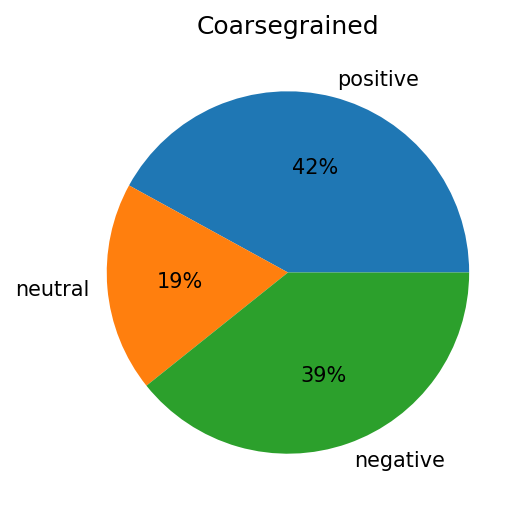

In [239]:
# # ds_train=ds_train+ds_telst
# ds_train.__dict__
labels = list(ds_train.label)+list(ds_test.label) 
from collections import Counter
Counter(labels).keys() # equals to list(set(words))
print(f"keys is {Counter(labels).keys()} values are {Counter(labels).values()}") # counts the elements' frequency
arr = Counter(labels).values()
arr = [item/sum(arr) for item in arr]
arr_new = [arr[0]+arr[1],arr[2],arr[3]+arr[4]]
labels_new = ["positive","neutral","negative"]
print(arr)
# matplotlib.pyplot.pie(x=arr,labels = Counter(labels).keys(),autopct='%.0f%%')
matplotlib.pyplot.pie(x=arr_new,labels = labels_new,autopct='%.0f%%')
pyplot.title("Coarsegrained")


pyplot.savefig("project/assets/data_analysis/coarse_grained_pie.png")

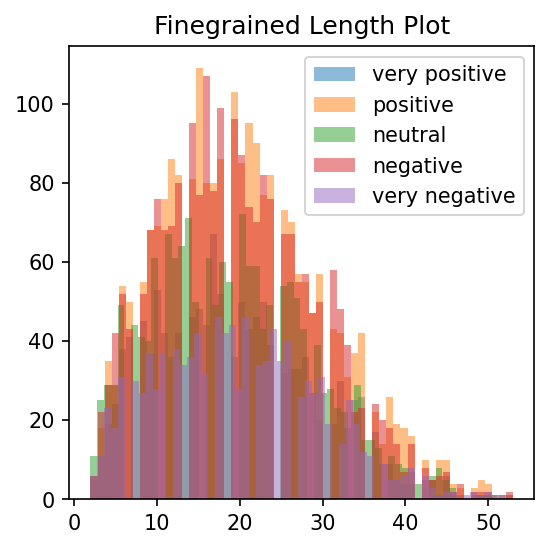

In [230]:
ds_train.examples[1].__dict__
label_to_len = {'very positive':[],'positive':[],'neutral':[],'very negative':[],'negative':[]}
for ex in ds_train.examples:
    label_to_len[ex.label] +=[len(ex.text)]
# print(label_to_len)

bins=60
pyplot.hist(label_to_len['very positive'], bins, alpha=0.5, label='very positive')
pyplot.hist(label_to_len['positive'], bins, alpha=0.5, label='positive')
pyplot.hist(label_to_len['neutral'], bins, alpha=0.5, label='neutral')
pyplot.hist(label_to_len['negative'], bins, alpha=0.5, label='negative')
pyplot.hist(label_to_len['very negative'], bins, alpha=0.5, label='very negative')
pyplot.legend(loc='upper right')
pyplot.title("Finegrained")
# pyplot.show()

pyplot.savefig("project/assets/data_analysis/finegrained_length_plot.png")
# matplotlib.pyplot.hist(,bins=40)

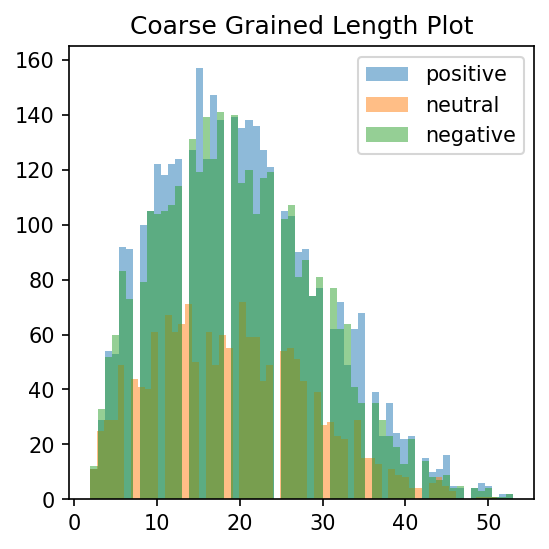

In [231]:
bins=60
pyplot.hist(label_to_len['very positive']+label_to_len['positive'], bins, alpha=0.5, label='positive')
# pyplot.hist(label_to_len['positive'], bins, alpha=0.5, label='positive')
pyplot.hist(label_to_len['neutral'], bins, alpha=0.5, label='neutral')
pyplot.hist(label_to_len['very negative']+label_to_len['negative'], bins, alpha=0.5, label='negative')
pyplot.legend(loc='upper right')
pyplot.title("Coarse Grained Length Plot")
# pyplot.show()
pyplot.savefig("project/assets/data_analysis/coarsegrained_length_plot.png")



In [5]:
m(torch.arange(0,12).long())
scores = m.last_dot_scores
print(scores.shape)


torch.Size([12, 12, 12])


#### Loading Existing Data

/Users/yiftachedelstain/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)
/Users/yiftachedelstain/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torchtext/data/example.py:94: UserWarning: Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.', UserWarning)
/Users/yiftachedelstain/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torchtext/data/example.py:78: User

AttentionModel(
  (layers): Sequential(
    (0): Embedding(15482, 300)
    (1): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (2): Sublayer(
      (attn): MultiplicativeAttention(
        (softmax): Softmax(dim=-1)
      )
      (channel_mod): Conv1d(300, 600, kernel_size=(1,), stride=(1,))
      (layer_norm): LayerNorm((600,), eps=1e-05, elementwise_affine=True)
    )
    (3): Linear(in_features=600, out_features=600, bias=False)
    (4): ReLU()
    (5): Dropout(p=0.7, inplace=False)
    (6): Sublayer(
      (attn): MultiplicativeAttention(
        (softmax): Softmax(dim=-1)
      )
      (channel_mod): Conv1d(600, 600, kernel_size=(1,), stride=(1,))
      (layer_norm): LayerNorm((600,), eps=1e-05, elementwise_affine=True)
    )
  )
  (fc): Linear(in_features=600, out_features=5, bias=False)
)
test_batch (1.301):  17%|█▋        | 6/35 [00:00<00:00, 41.40it/s]

/Users/yiftachedelstain/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


test_batch (Avg. Loss 1.303, Accuracy 44.7): 100%|██████████| 35/35 [00:01<00:00, 19.22it/s]
[[1.         0.29137529 0.33333333 0.56937799 0.09876543]
 [0.4229249  1.         0.13333333 0.09569378 0.92592593]
 [0.50988142 0.48018648 1.         0.10047847 0.22222222]
 [0.58893281 0.09090909 0.06666667 1.         0.01234568]
 [0.16600791 0.35664336 0.06666667 0.00956938 1.        ]]


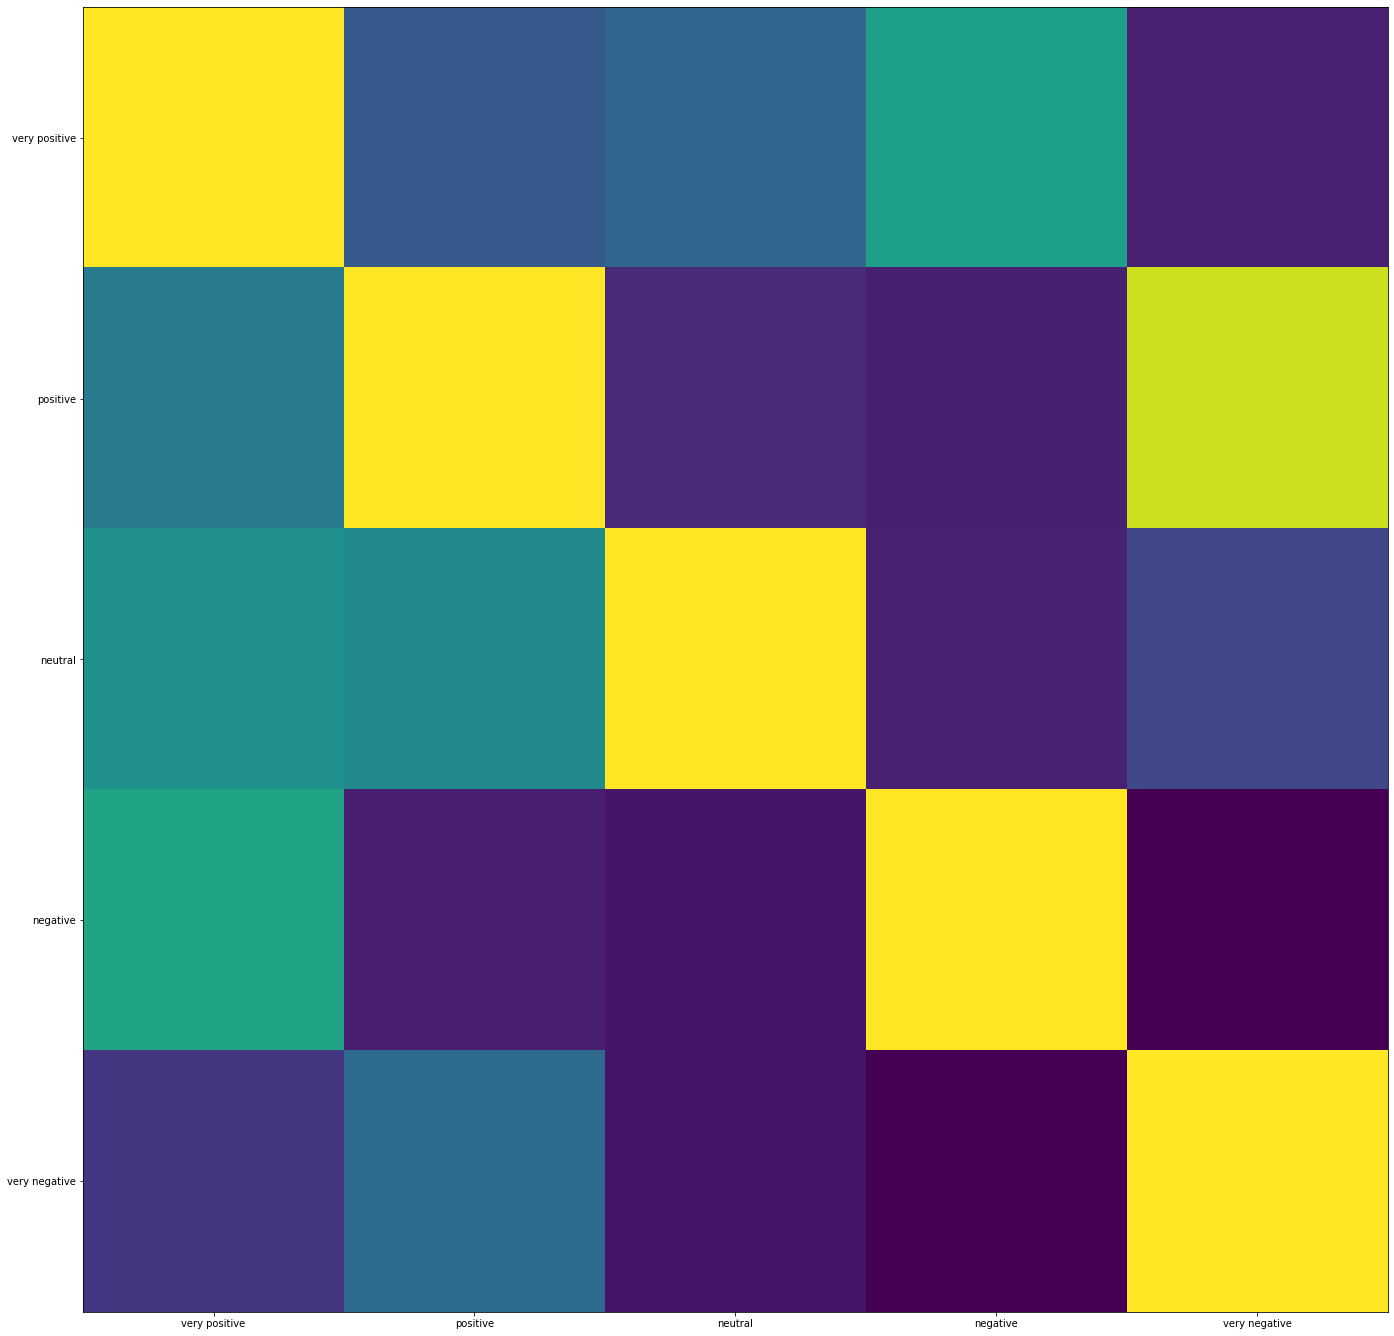

In [248]:
# scores[:,:,0]
import torchtext
from project.HW3_additions.training import LSTMTrainer, AttentionTrainer
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(42)
ds_train,ds_valid,ds_test,_,_,_,_ = model.load_data()



BATCH_SIZE=64
device='cpu'
loss=nn.NLLLoss()
dl_train, dl_valid, dl_test = torchtext.data.BucketIterator.splits(
    (ds_train, ds_valid, ds_test), batch_size=BATCH_SIZE,
    shuffle=True, device=device)
print(m)
lr=1e-3
optimizer = optim.Adam(m.parameters(),lr=lr)
trainer = AttentionTrainer(m,loss,optimizer,device)
res=trainer.test_epoch(dl_test)

# res=trainer.test_epoch(dl_test)
# res=trainer.test_epoch(dl_test)


# print(res)
predictions = res.predictions
results = res.results

mat = confusion_matrix(results, predictions)
from sklearn.preprocessing import normalize
data = normalize(mat, axis=0, norm='max')
fig, ax = plt.subplots(figsize=(24,24))
img = ax.imshow(mat)
ax.set_xticks(range(5))
ax.set_yticks(range(5))
labels = ["very positive","positive","neutral","negative","very negative"]
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

print(data)
# mat.plot()
ax.imshow(data)

# plt.show()
pyplot.savefig("project/assets/confusion_matrices/attention_confusion_map.png")



# print(disp)

# # NOTE: Fill all variables here with default values of the plot_confusion_matrix
# disp = disp.plot()
# #                   ax=ax, xticks_rotation=xticks_rotation)

# plt.show()

# # scores[:,:,]
# # scores[:,0,:]

# # scores[:,0,:]





In [82]:
ds_train,ds_valid,ds_test,_, rev_parse,lab_parse,vocab = model.load_data()
# print(rev_parse.vocab.__dict__)
ds_train[0].text

5

positive
['it', "'s", 'a', 'day', 'at', 'the', 'beach', '--', 'with', 'air', 'conditioning', 'and', 'popcorn', '.']
14


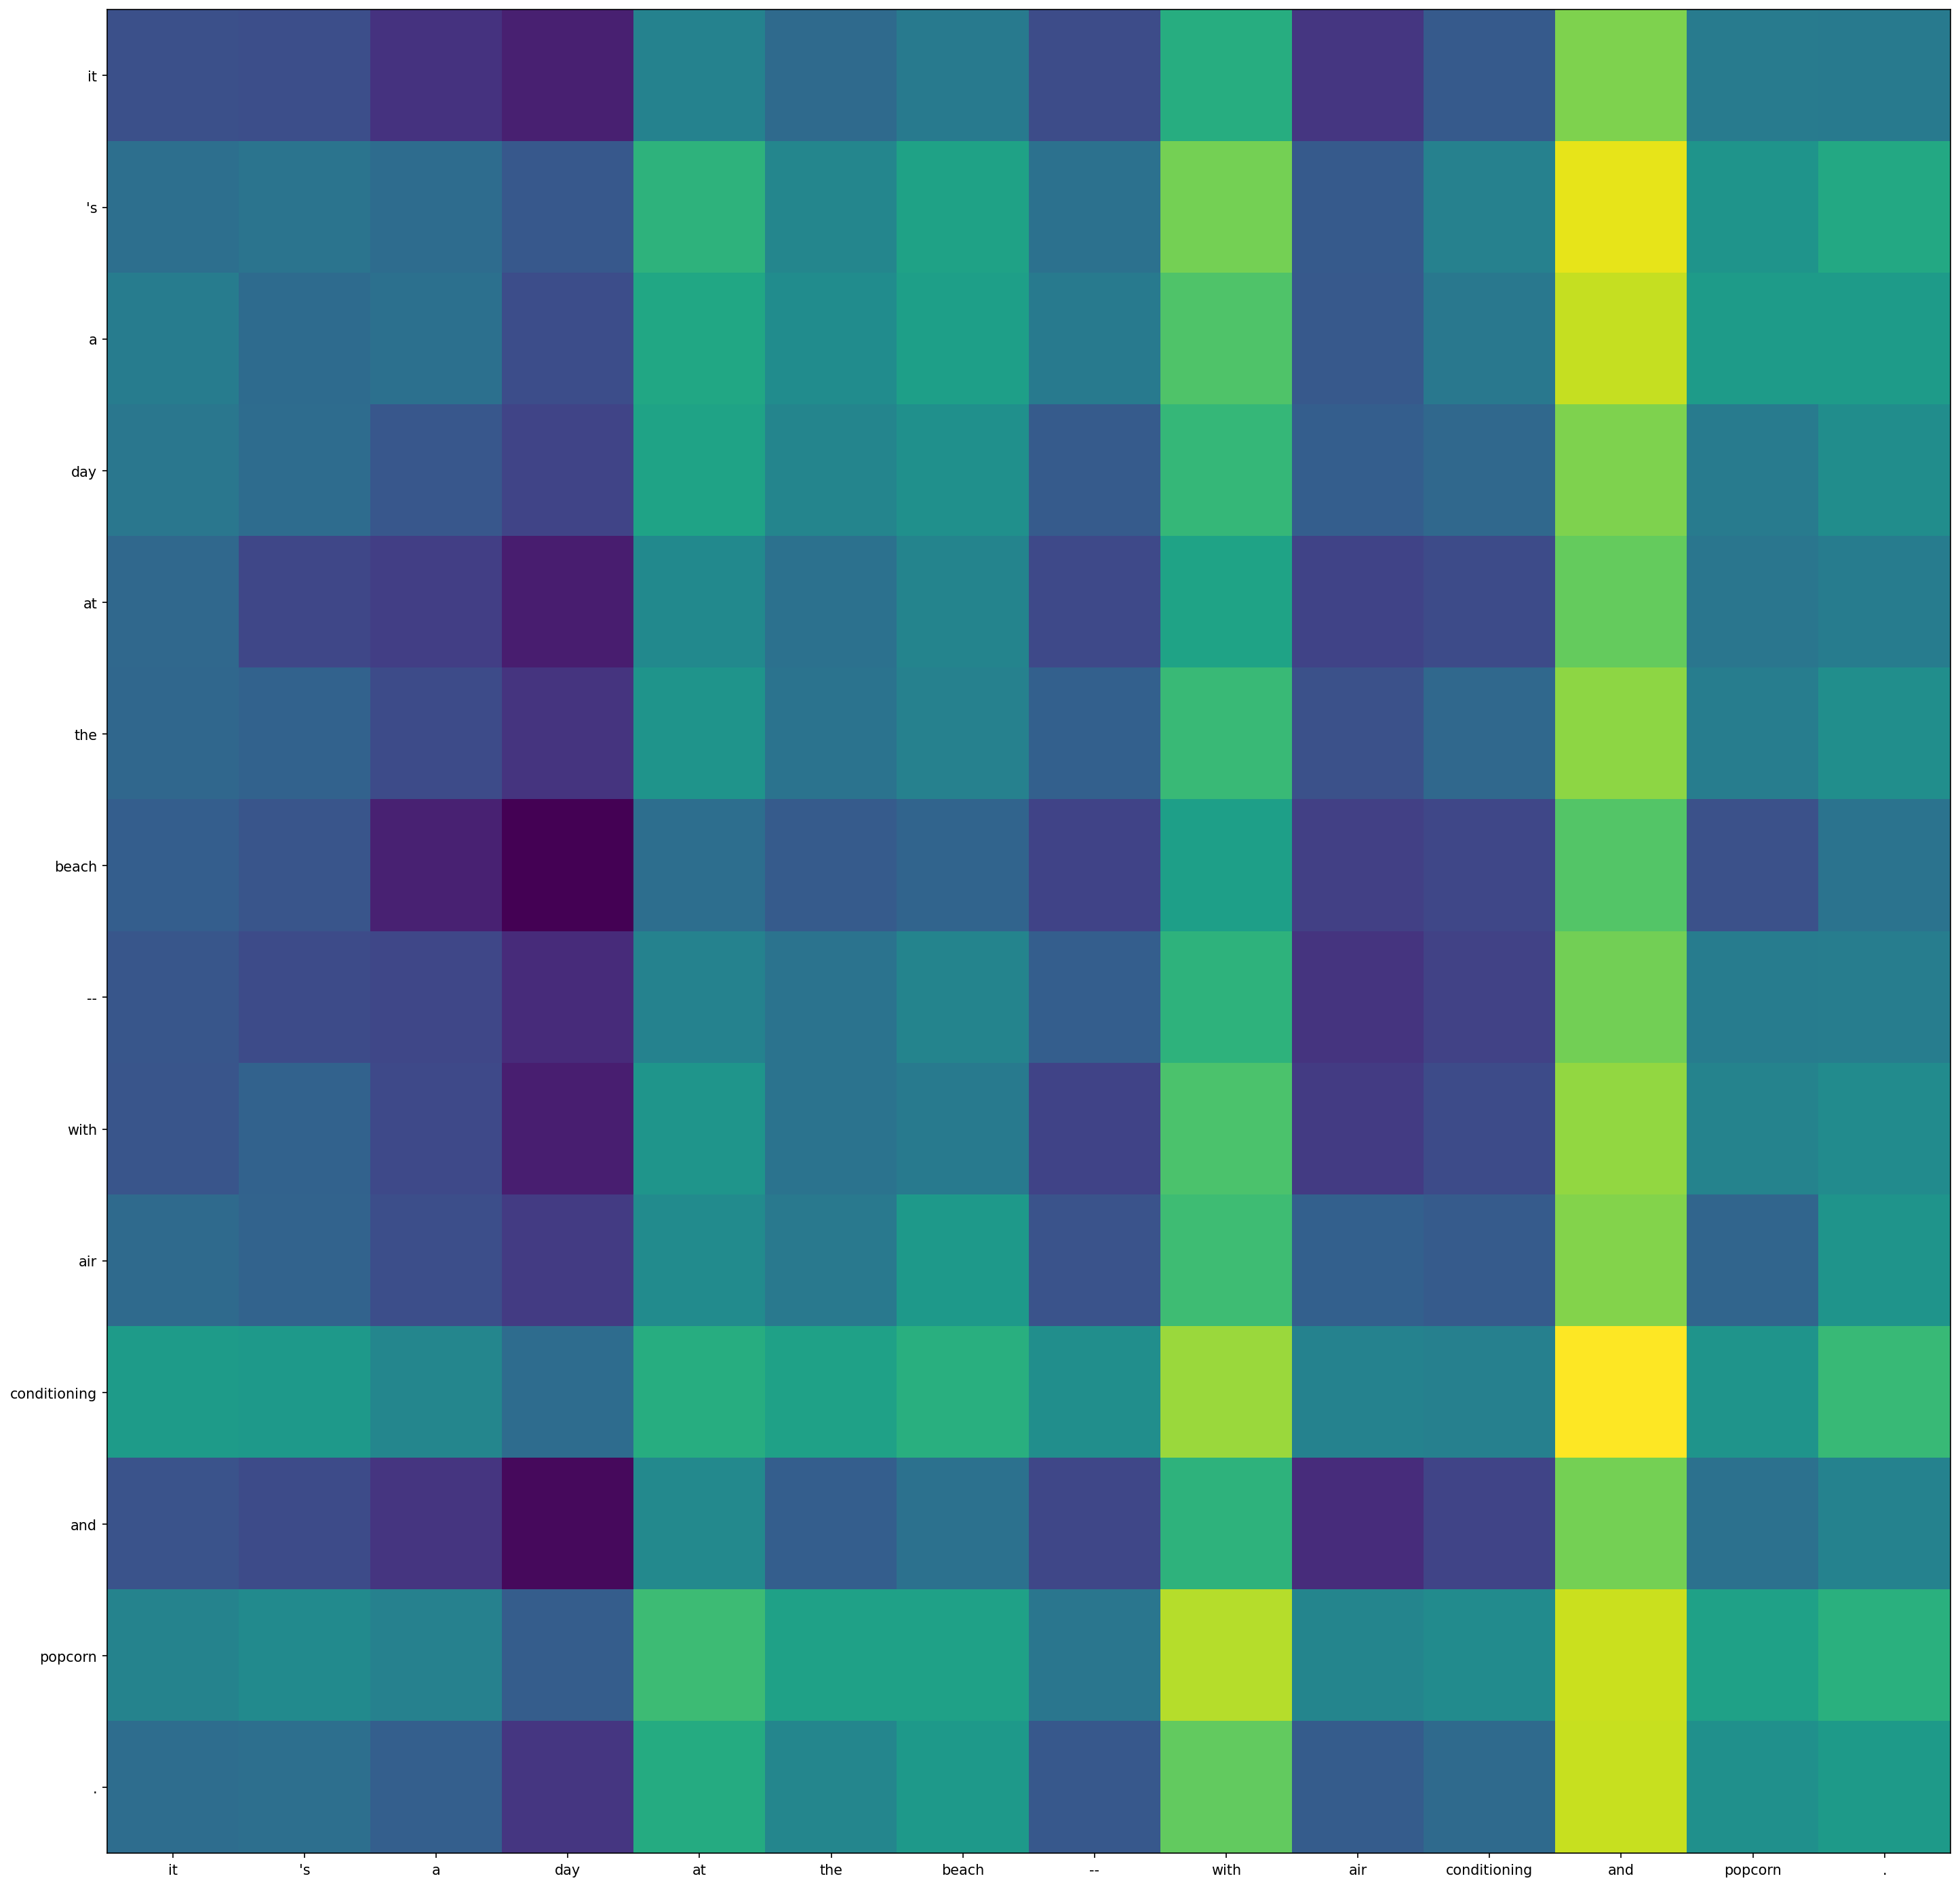

In [208]:
id = 200

review1 = [rev_parse.vocab[item] for item in ds_train[id].text]
print(ds_train[id].label)
print(ds_train[id].text)
print(len(ds_train[id].text))
# print(len(ds_train[0].text))
m(torch.LongTensor(review1).unsqueeze(0))
fig, ax = plt.subplots(figsize=(24,24))
mat = m.last_dot_scores[0].detach().numpy()
# data = normalize(mat, axis=1, norm='max')


img = ax.imshow(mat)
len_rev = len(ds_train[id].text)
ax.set_xticks(range(len_rev))
ax.set_yticks(range(len_rev))

ax.set_yticklabels(ds_train[id].text)
ax.set_xticklabels(ds_train[id].text)

plt.savefig('attention_positive_2.png')


In [206]:
a = [id for id in range(1000) if ds_train[id].label == 'positive']
a

[0,
 2,
 4,
 7,
 9,
 15,
 16,
 19,
 21,
 27,
 31,
 33,
 35,
 36,
 37,
 39,
 40,
 43,
 46,
 47,
 50,
 52,
 57,
 58,
 59,
 61,
 62,
 63,
 67,
 70,
 73,
 76,
 81,
 84,
 85,
 88,
 90,
 91,
 94,
 95,
 97,
 98,
 100,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 114,
 115,
 118,
 119,
 120,
 122,
 124,
 125,
 126,
 133,
 134,
 135,
 136,
 140,
 142,
 143,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 158,
 161,
 162,
 166,
 169,
 171,
 172,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 187,
 188,
 190,
 191,
 192,
 195,
 199,
 200,
 202,
 205,
 206,
 207,
 208,
 209,
 215,
 216,
 217,
 218,
 220,
 222,
 223,
 227,
 228,
 229,
 230,
 232,
 233,
 234,
 235,
 240,
 244,
 247,
 249,
 250,
 252,
 253,
 254,
 255,
 256,
 257,
 259,
 260,
 262,
 264,
 265,
 268,
 269,
 271,
 272,
 276,
 281,
 282,
 284,
 286,
 287,
 289,
 291,
 292,
 298,
 299,
 301,
 302,
 305,
 306,
 310,
 314,
 315,
 317,
 318,
 319,
 320,
 321,
 325,
 329,
 331,
 332,
 333,
 335,
 336,
 339,
 34

[[0.6275806  0.69435036 0.8128471  ... 0.81655246 0.74338454 0.6275806 ]
 [0.7097134  0.63228387 0.73182464 ... 0.7764036  0.63439023 0.7097134 ]
 [0.5801112  0.56004447 0.53396934 ... 0.66271776 0.52638376 0.5801112 ]
 ...
 [0.77110744 0.7808592  0.71982    ... 0.80108345 0.74289584 0.77110744]
 [0.5891043  0.58499503 0.6519963  ... 0.66994524 0.53427786 0.5891043 ]
 [0.6275806  0.69435036 0.8128471  ... 0.81655246 0.74338454 0.6275806 ]]


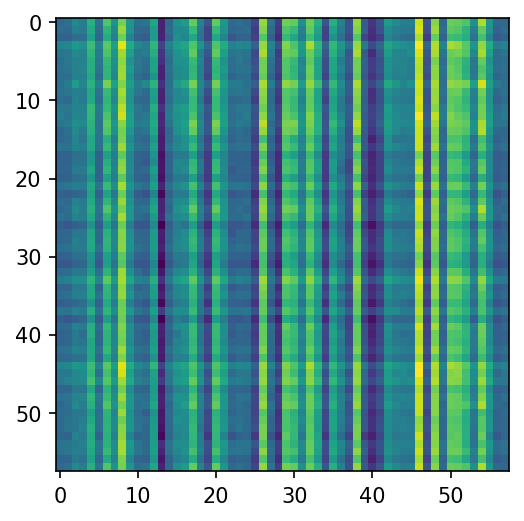

In [60]:
m.last_dot_scores[0].numpy()

mat = confusion_matrix(results, predictions)
from sklearn.preprocessing import normalize
data = normalize(m.last_dot_scores[0].numpy(), axis=0, norm='max')

print(data)
# mat.plot()
plt.imshow(m.last_dot_scores[0].numpy())
plt.show()



/Users/yiftachedelstain/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)
/Users/yiftachedelstain/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torchtext/data/example.py:94: UserWarning: Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.', UserWarning)
/Users/yiftachedelstain/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torchtext/data/example.py:78: User

LSTMModel(
  (embedding): Embedding(15482, 300)
  (lstm_net): LSTM(300, 100, num_layers=2, batch_first=True, dropout=0.7)
  (output_layer): Linear(in_features=100, out_features=5, bias=False)
  (log_softmax): LogSoftmax(dim=1)
)
test_batch (1.413):  43%|████▎     | 15/35 [00:00<00:00, 105.96it/s]

/Users/yiftachedelstain/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


test_batch (Avg. Loss 1.393, Accuracy 41.6): 100%|██████████| 35/35 [00:00<00:00, 64.80it/s]
[[1.         0.27350427 0.53571429 0.66225166 0.05208333]
 [0.53741497 1.         0.92857143 0.01324503 1.        ]
 [0.58503401 0.45299145 1.         0.07284768 0.19791667]
 [0.74829932 0.06267806 0.21428571 1.         0.        ]
 [0.1462585  0.36467236 0.39285714 0.00662252 1.        ]]


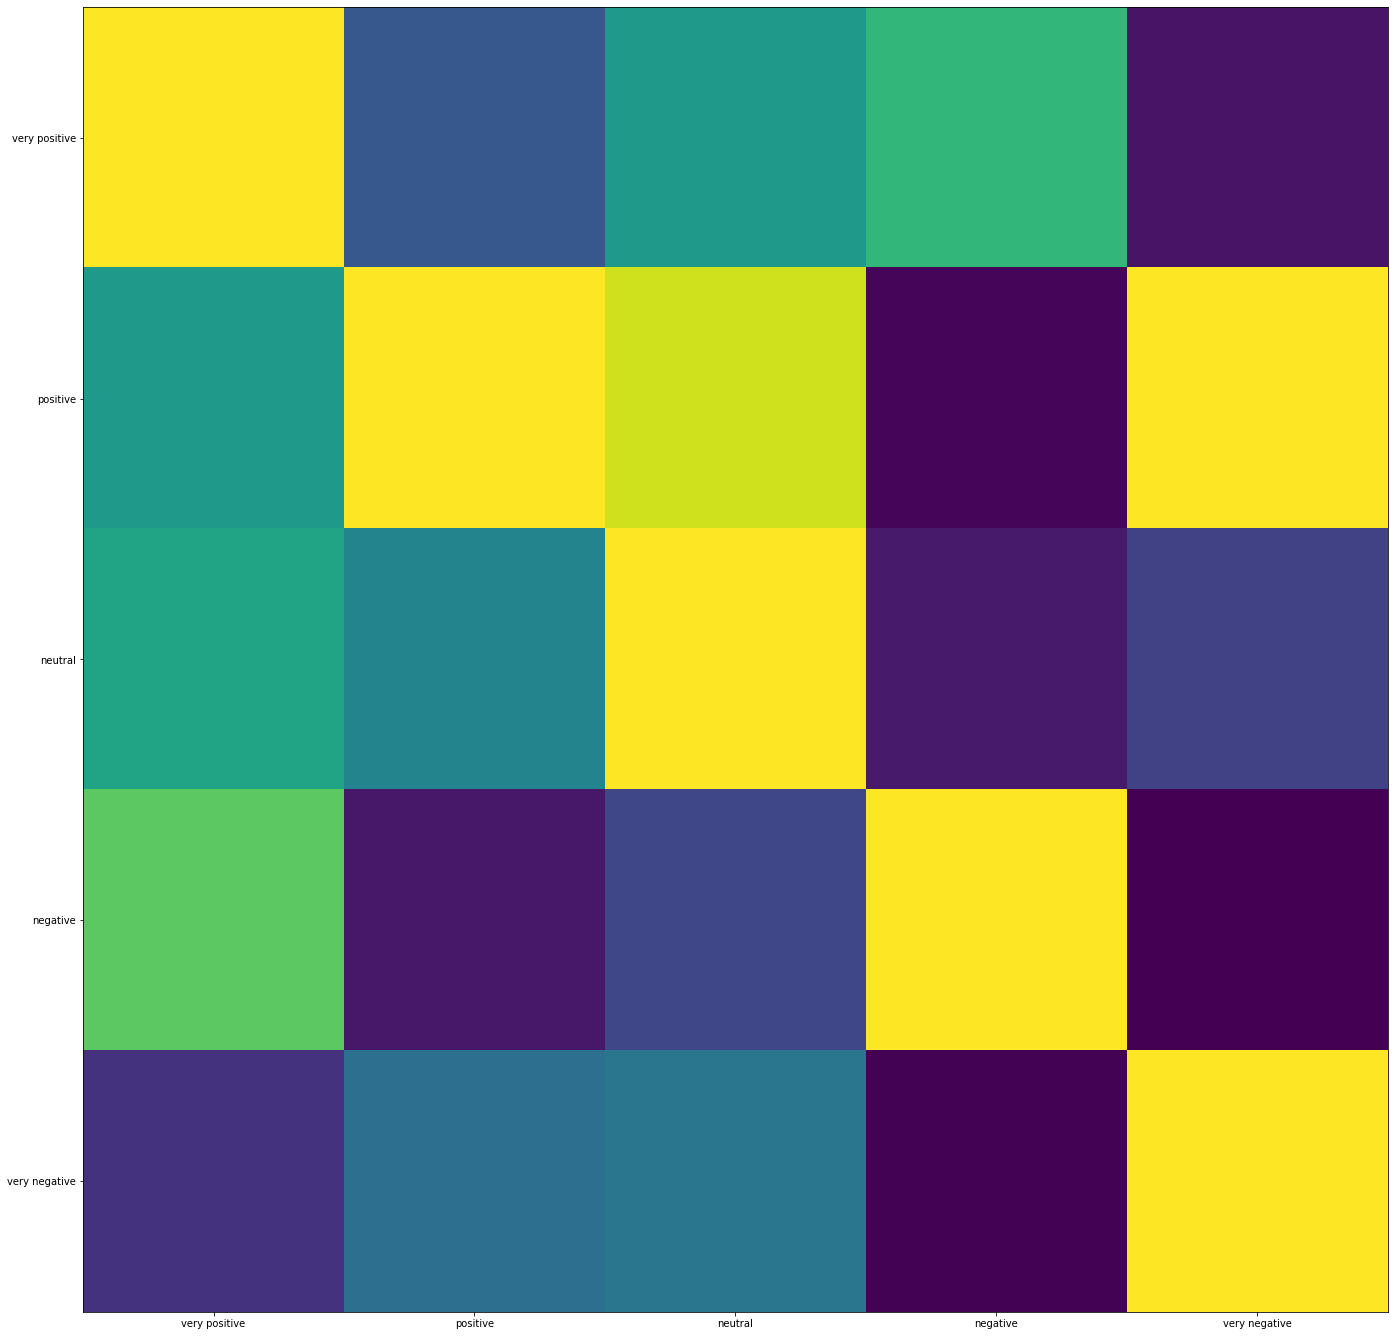

In [247]:
from project.HW3_additions.training import LSTMTrainer, AttentionTrainer
import torch.optim as optim
import torchtext
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

ds_train,ds_valid,ds_test,_,_,_,_ = model.load_data()



BATCH_SIZE=64
device='cpu'
loss=nn.NLLLoss()
dl_train, dl_valid, dl_test = torchtext.data.BucketIterator.splits(
    (ds_train, ds_valid, ds_test), batch_size=BATCH_SIZE,
    shuffle=True, device='cpu')
    
lr=0.1
loss=nn.NLLLoss()
learning_model = model.LSTMModel(embedding_dim=300,hidden_dim=100,num_layers=2,bidirectional=False,embedding = embeding,device='cpu',dropout=0.7)
print(learning_model)
learning_model.load_state_dict(torch.load('lstm.pt',map_location='cpu')['model_state'])
optimizer = optim.Adam(learning_model.parameters(),lr=lr)


trainer = LSTMTrainer(learning_model,loss,optimizer,'cpu')
res=trainer.test_epoch(dl_test)
predictions = res.predictions
results = res.results

mat = confusion_matrix(results, predictions)
from sklearn.preprocessing import normalize
data = normalize(mat, axis=0, norm='max')

fig, ax = plt.subplots(figsize=(24,24))
img = ax.imshow(mat)
ax.set_xticks(range(5))
ax.set_yticks(range(5))
labels = ["very positive","positive","neutral","negative","very negative"]
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

print(data)
# mat.plot()
ax.imshow(data)
# plt.show()
plt.savefig("project/assets/confusion_matrices/lstm_confusion_map.png")
